<a href="https://colab.research.google.com/github/SandraFB/Refactorizacion-de-codigo/blob/main/soluci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Iniciando Pipeline de Procesamiento de Calificaciones ---
Cargando datos iniciales...
Limpiando datos. Reemplazando NaN con 5.0...
Calculando promedios...
Asignando estatus a los alumnos...

--- ✅ PROCESAMIENTO COMPLETO ---
   Nombre  Programacion  Estadistica  Calculo  Promedio       Estatus
0     Ana           8.0            9     10.0  9.000000      Aprobado
1    Luis           7.0            8      5.0  6.666667      Aprobado
2   Pedro           5.0            7      8.0  6.666667      Aprobado
3   Marta           9.0            8      7.0  8.000000      Aprobado
4   Julia          10.0            9      8.0  9.000000      Aprobado
5  Carlos           5.0            6      5.0  5.333333  Recuperación

--- ⚠️ ALUMNOS EN RIESGO (Recuperación o Reprobados) ---
- Carlos (Promedio: 5.33, Estatus: Recuperación)

Generando visualización de promedios...


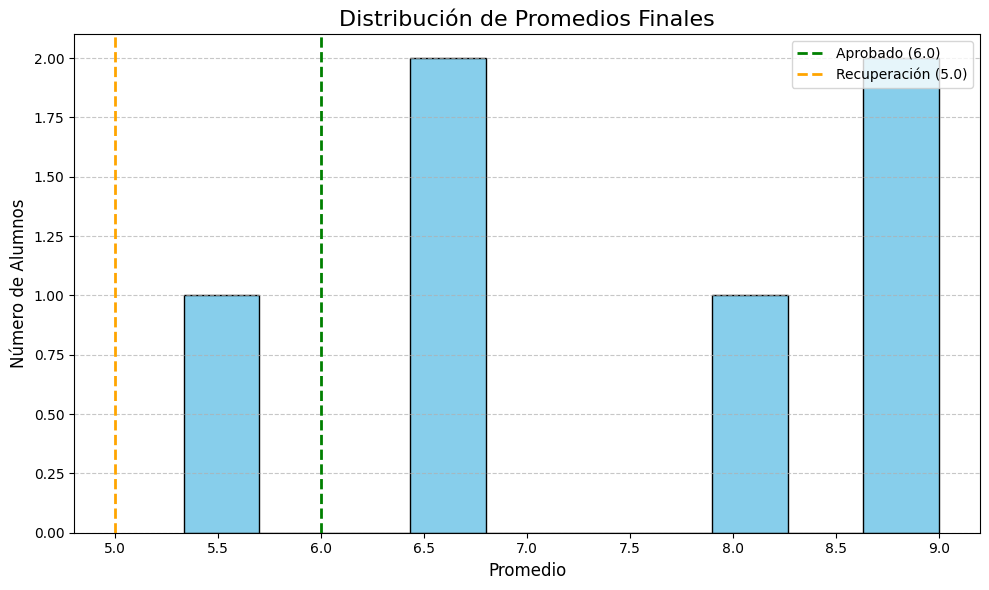

--- Pipeline finalizado ---


In [ ]:
"""
Práctica de Refactorización: Procesamiento de Calificaciones de Alumnos.

Este script carga datos de alumnos, limpia valores nulos, calcula promedios,
asigna un estatus de aprobación y visualiza la distribución de calificaciones.
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Constantes Globales ---
# Buena práctica: Evitar "números mágicos" en el código.
NOTA_APROBADO = 6.0
NOTA_RECUPERACION = 5.0
CALIFICACION_REEMPLAZO_NAN = 5.0 # La nota que se usará para NAs

def crear_dataframe_alumnos() -> pd.DataFrame:
    """
    Crea y retorna un DataFrame de pandas con datos iniciales de alumnos.

    Las columnas se renombran de 'v1', 'v2', etc., a nombres legibles.

    Returns:
        pd.DataFrame: DataFrame con los datos de los alumnos.
    """
    print("Cargando datos iniciales...")
    datos = {'v1': ['Ana', 'Luis', 'Pedro', 'Marta', 'Julia', 'Carlos'],
             'v2': [8, 7, np.nan, 9, 10, 5],
             'v3': [9, 8, 7, 8, 9, 6],
             'v4': [10, np.nan, 8, 7, 8, np.nan]}

    df = pd.DataFrame(datos)

    # Renombrar columnas a algo legible
    df.columns = ['Nombre', 'Programacion', 'Estadistica', 'Calculo']
    return df

def limpiar_datos(df: pd.DataFrame, valor_relleno: float) -> pd.DataFrame:
    """
    Limpia el DataFrame, rellenando valores nulos (NaN) en las materias.

    Args:
        df (pd.DataFrame): El DataFrame de alumnos.
        valor_relleno (float): El valor a usar para rellenar los NaN.

    Returns:
        pd.DataFrame: El DataFrame con datos limpios.
    """
    print(f"Limpiando datos. Reemplazando NaN con {valor_relleno}...")
    columnas_materias = ['Programacion', 'Estadistica', 'Calculo']

    # Rellenamos los NaN con el valor especificado
    df[columnas_materias] = df[columnas_materias].fillna(valor_relleno)
    return df

def calcular_promedio(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calcula el promedio de las materias para cada alumno.

    Usa operaciones vectorizadas de pandas (más rápido que un bucle for).

    Args:
        df (pd.DataFrame): El DataFrame con datos limpios.

    Returns:
        pd.DataFrame: El DataFrame con una nueva columna 'Promedio'.
    """
    print("Calculando promedios...")
    columnas_materias = ['Programacion', 'Estadistica', 'Calculo']

    # Operación vectorizada: calcula la media por fila (axis=1)
    # Esto reemplaza el ineficiente bucle 'for i in range(len(df))'
    df['Promedio'] = df[columnas_materias].mean(axis=1)
    return df

def _determinar_estatus_alumno(promedio: float) -> str:
    """
    Función auxiliar para determinar el estatus de un alumno basado en su promedio.

    Esta función usa lógica de control de flujo (if/elif/else).

    Args:
        promedio (float): El promedio del alumno.

    Returns:
        str: El estatus ('Aprobado', 'Recuperación', 'Reprobado').
    """
    if promedio > NOTA_APROBADO:
        return 'Aprobado'
    elif promedio >= NOTA_RECUPERACION:
        return 'Recuperación'
    else:
        return 'Reprobado'

def asignar_estatus_alumnos(df: pd.DataFrame) -> pd.DataFrame:
    """
    Asigna un estatus a cada alumno usando el método .apply() de pandas.

    .apply() aplica la función '_determinar_estatus_alumno' a cada
    valor de la columna 'Promedio'.

    Args:
        df (pd.DataFrame): DataFrame con la columna 'Promedio'.

    Returns:
        pd.DataFrame: DataFrame con la nueva columna 'Estatus'.
    """
    print("Asignando estatus a los alumnos...")
    # Usamos .apply() para aplicar la lógica de control de flujo
    # Esto reemplaza el segundo bucle 'for'
    df['Estatus'] = df['Promedio'].apply(_determinar_estatus_alumno)
    return df

def reportar_alumnos_en_riesgo(df: pd.DataFrame):
    """
    Imprime en consola los nombres de los alumnos reprobados o en recuperación.

    Usa un bucle 'for' para iterar sobre un subconjunto filtrado del DataFrame.

    Args:
        df (pd.DataFrame): El DataFrame final.
    """
    # Filtrado de Pandas
    alumnos_riesgo = df[df['Estatus'] != 'Aprobado']

    print("\n--- ⚠️ ALUMNOS EN RIESGO (Recuperación o Reprobados) ---")
    if alumnos_riesgo.empty:
        print("¡Felicidades! Todos los alumnos están aprobados.")
    else:
        # Bucle 'for' para imprimir resultados de forma legible
        for index, alumno in alumnos_riesgo.iterrows():
            print(f"- {alumno['Nombre']} (Promedio: {alumno['Promedio']:.2f}, Estatus: {alumno['Estatus']})")

def visualizar_distribucion_promedios(df: pd.DataFrame):
    """
    Crea y muestra un histograma de la distribución de promedios.

    Usa Matplotlib para una visualización clara y profesional.

    Args:
        df (pd.DataFrame): El DataFrame final.
    """
    print("\nGenerando visualización de promedios...")

    plt.figure(figsize=(10, 6)) # Tamaño de la figura

    # Creación del histograma
    plt.hist(df['Promedio'], bins=10, color='skyblue', edgecolor='black')

    # Títulos y etiquetas claras
    plt.title('Distribución de Promedios Finales', fontsize=16)
    plt.xlabel('Promedio', fontsize=12)
    plt.ylabel('Número de Alumnos', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Añadir líneas verticales para las notas de corte
    plt.axvline(NOTA_APROBADO, color='green', linestyle='dashed', linewidth=2, label=f'Aprobado ({NOTA_APROBADO})')
    plt.axvline(NOTA_RECUPERACION, color='orange', linestyle='dashed', linewidth=2, label=f'Recuperación ({NOTA_RECUPERACION})')
    plt.legend()

    # Mostrar el gráfico
    plt.tight_layout() # Ajusta el gráfico para que todo quepa
    plt.show()

def main():
    """
    Función principal que orquesta la ejecución del script.

    Sigue el flujo: Cargar -> Limpiar -> Procesar -> Analizar -> Visualizar
    """
    print("--- Iniciando Pipeline de Procesamiento de Calificaciones ---")

    # 1. Cargar
    df_alumnos = crear_dataframe_alumnos()

    # 2. Limpiar
    df_limpio = limpiar_datos(df_alumnos, CALIFICACION_REEMPLAZO_NAN)

    # 3. Procesar (Calcular Promedio)
    df_promedios = calcular_promedio(df_limpio)

    # 4. Analizar (Asignar Estatus)
    df_final = asignar_estatus_alumnos(df_promedios)

    print("\n--- ✅ PROCESAMIENTO COMPLETO ---")
    print(df_final.to_string()) # .to_string() asegura que se muestre todo

    reportar_alumnos_en_riesgo(df_final)

    # 5. Visualizar
    visualizar_distribucion_promedios(df_final)

    print("--- Pipeline finalizado ---")

# Buena práctica en Python:
# Asegura que main() solo se ejecute cuando el script es llamado directamente
if __name__ == "__main__":
    main()